## GeoCenPy: Easily Visualize Census Data

### What is it?

This project will utilize Cartographic GeoJSON boundary files from the Census' CitySDK and the Census' Population Estimate APIs to create a package to make mapping Census geography data easier for Python users. 

The current information is primarily available to SDK users in Javascript. Currently, developers can get Census GeoJSON shapefiles by directly downloading it from the agency's [website](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html) or through Python wrappers that download the shapefiles for you. This package will instead transform the data into a user-friendly output of either a geopandas.GeoDataFrame or a geoplot.plotlyplot. 

### **Links to Data Sources and Information**

API Portal: [Census CitySDK Github](https://github.com/uscensusbureau/citysdk/tree/master/v2/GeoJSON)  \
Currently, there is no direct API Portal to make requests. Raw JSON files from the Census Github CitySDK repository as my "API link." Here is an example of a [file](https://raw.githubusercontent.com/uscensusbureau/citysdk/master/v2/GeoJSON/500k/103/01/congressional-district.json). All URLS follow the same pattern which will make it easy to automate for functions. 

Parameters: Available on the Census [website](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html) or the parameters of the GeoJSON files are also listed in the README file of the Github repo linked above. 
- Vintage (Year)
- Shapefile Resolution
- Geographic summary level 

API Portal: [Population Estimates APIs](https://www.census.gov/data/developers/data-sets/popest-popproj/popest.html) \
Each year, the Census Bureau's Population Estimates Program uses current data on births, deaths, and migration to calculate population change since the most recent decennial census and produces a time series of estimates of population, demographic components of change, and housing units. The Population Estimates and Housing Unit Estimates for the US, States, and Counties
 APIs are in mapping functions in conjunction with the GeoJSON files.
 
 Parameters for [population esitmates API](https://api.census.gov/data/2019/pep/population/variables.html) and [Housing Unit Estimates for the US, States, and Counties](https://api.census.gov/data/2019/pep/housing/variables.html)
 
 ### Examples


In [2]:
from geocenpy import geocenpy

In [14]:
with open(r'C:\Users\Elliott\Desktop\census_key.txt') as key:
    my_api_key = key.read().strip()

In [6]:
#What are the available GeoJSON files?
geocenpy.list_geoparams().head(5)

,Geographic Area Type,1990,2000,2010,2012,2013 - 2015,2016 - 2019
0,"""alaska native regional corporation""",Yes,Yes,Yes,NaN,Yes,Yes
1,"""american indian-area/alaska native area/hawai...",Yes,Yes,Yes,NaN,Yes,Yes
2,"""block group""",Yes,Yes,Yes,NaN,Yes,Yes
3,"""combined new england city and town area""",NaN,NaN,Yes,NaN,NaN,Yes
4,"""combined statistical area""",NaN,NaN,Yes,NaN,Yes,Yes


In [7]:
#get a transformed GeoJSON file to make pretty plots on Python
geocenpy.get_geocen_df(quality = "20m", year = "2010", area_type= "county").head(5)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."


In [9]:
#get state ids for your reference
geocenpy.get_state_ids("OR")

,NAME,STUSPS,STATEFP,STATENS,AFFGEOID,GEOID
12,Oregon,OR,41,01155107,0400000US41,41


<AxesSubplot:>

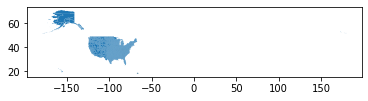

In [10]:
#let us plot the cartographic area
geocenpy.get_geocen_plot(quality ="20m", year="2010", area_type="county", boundaries=False)

<AxesSubplot:>

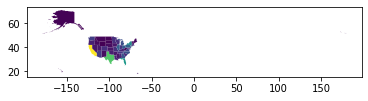

In [15]:
#how about with population info?
geocenpy.get_pop(api_key = my_api_key, year="2019", map = True)

<AxesSubplot:>

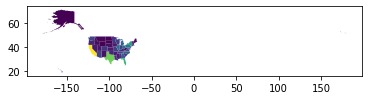

In [17]:
#And with housing estimates?
geocenpy.get_house_est(api_key = my_api_key, year="2019", map = True)

<AxesSubplot:>

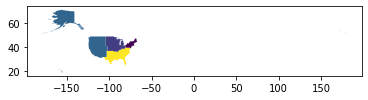

In [18]:
#Let's see the population broken down by region instead
geocenpy.get_region_pop(api_key = my_api_key, year="2019", map = True)


<AxesSubplot:>

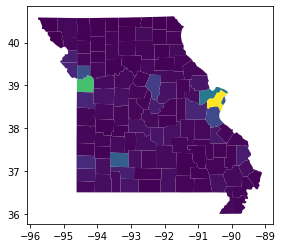

In [19]:
#And lastly let's narrow down to a state's population
geocenpy.get_state_pop(api_key = my_api_key, year="2019", state_fip = "29", map = True)

### Looking Forward

I'd like to expand this package to have more mapping functions in the future, perhaps by making the area type a parameter. I'd also like to make a customized Census color scheme to match with their branding! 

### Testing

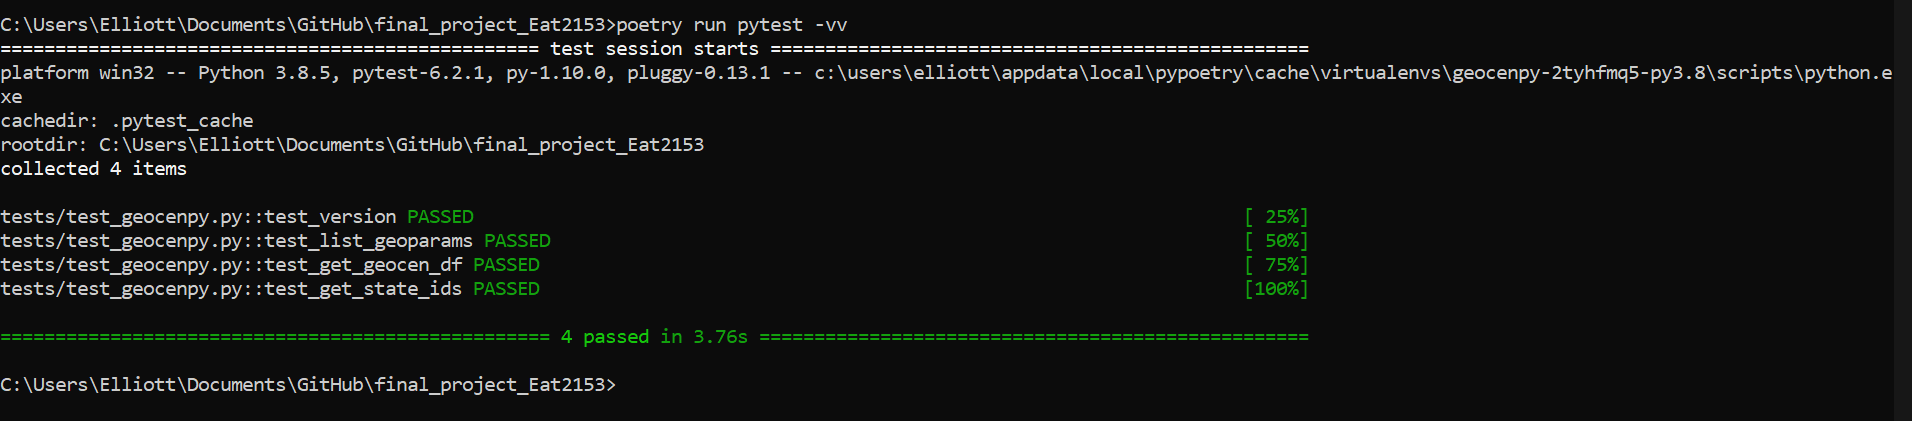